![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1496]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
pd.set_option('display.max_colwidth', -1)

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [1497]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [1498]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [1499]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [1500]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [1501]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel restaurant'], ['12/31/2017', '11/20/2017']]",/Restaurant_Review-g187147-d1912643-Reviews-R_Yves-Paris_Ile_de_France.html,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food'], ['07/06/2017', '06/19/2016']]",/Restaurant_Review-g189852-d7992032-Reviews-Buddha_Nepal-Stockholm.html,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Vegetarian Friendly', 'Vegan Options', 'Gluten Free Options']",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'], ['01/08/2018', '01/06/2018']]",/Restaurant_Review-g186338-d8632781-Reviews-ROKA_Mayfair-London_England.html,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Esplanade-Berlin.html,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Friendly']",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice building but improvements need to be...'], ['11/18/2017', '02/19/2017']]",/Restaurant_Review-g187309-d6864963-Reviews-Augustiner_Schutzen_Garten-Munich_Upper_Bavaria_Bavaria.html,d6864963


In [1502]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [1503]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-Le_Perchoir-Paris_Ile_de_France.html,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Options', 'Vegetarian Friendly', 'Vegan Options']",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]",/Restaurant_Review-g189934-d6674944-Reviews-Ravintola_Kolmon3n-Helsinki_Uusimaa.html,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/28/2017', '12/06/2017']]",/Restaurant_Review-g186525-d13129638-Reviews-Black_Ivy-Edinburgh_Scotland.html,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vegetarian Friendly', 'Gluten Free Options']",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic'], ['12/06/2017', '11/22/2017']]",/Restaurant_Review-g186338-d680417-Reviews-Quirinale-London_England.html,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seafood', 'Vegetarian Friendly', 'Gluten Free Options']",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good but pricey'], ['02/08/2018', '01/24/2018']]",/Restaurant_Review-g274924-d1112354-Reviews-Massimo_Ristorante-Bratislava_Bratislava_Region.html,d1112354


In [1504]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [1505]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [1506]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [1507]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [1508]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
1930,id_1930,Paris,['African'],8378.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187147-d13149605-Reviews-O_Maquis-Paris_Ile_de_France.html,d13149605,0,0.0
26658,id_4998,Paris,"['French', 'European']",4999.0,$$ - $$$,232.0,"[['Good french bistro.', 'fabulous food'], ['04/20/2017', '11/16/2016']]",/Restaurant_Review-g187147-d2058328-Reviews-Bistro_des_Gastronomes-Paris_Ile_de_France.html,d2058328,1,4.0
20287,id_1697,Warsaw,"['Polish', 'European']",1699.0,$$ - $$$,13.0,"[['Better than the hotel itself, avoid if you...', 'Very good value well-made Polish home cook...'], ['12/25/2012', '10/08/2012']]",/Restaurant_Review-g274856-d3542768-Reviews-Dom_Chlopa-Warsaw_Mazovia_Province_Central_Poland.html,d3542768,1,4.0
19866,id_1661,Budapest,NaN,1662.0,NaN,4.0,"[['Pizza is great but meal is mediocre', 'Great Fresh Pizza'], ['04/27/2017', '02/22/2017']]",/Restaurant_Review-g274887-d12182388-Reviews-Stefano_Pizzeria_Salata_Tesztahaz-Budapest_Central_Hungary.html,d12182388,1,4.0
2692,id_2692,Lyon,"['French', 'European', 'Vegetarian Friendly', 'Vegan Options']",166.0,$$ - $$$,256.0,"[['Good service, awful bland food, overpriced', 'no vegan dishes available'], ['01/14/2017', '12/18/2016']]",/Restaurant_Review-g187265-d2000924-Reviews-Place_des_sens-Lyon_Rhone_Auvergne_Rhone_Alpes.html,d2000924,0,0.0


In [1509]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [1510]:
# Let's see what data we have in the dataframe
for column in data.columns:
    if data[column].isna().any():
        print('Column: {}; Data: {}\n'.format(column, data[column].unique()))

Column: Cuisine Style; Data: ["['Bar', 'Pub']"
 "['European', 'Scandinavian', 'Gluten Free Options', 'Vegetarian Friendly', 'Vegan Options']"
 "['Vegetarian Friendly']" ...
 "['Steakhouse', 'Barbecue', 'Australian', 'Argentinean', 'South American']"
 "['French', 'American', 'Cafe', 'Healthy', 'Soups']"
 "['French', 'Contemporary', 'Fusion', 'Gastropub']"]

Column: Price Range; Data: ['$$ - $$$' '$$$$' '$' nan]

Column: Number of Reviews; Data: [   4.   97.   28. ...  765. 2272. 2297.]

Column: Reviews; Data: ['[[], []]'
 "[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"
 "[['Better than the Links', 'Ivy Black'], ['12/28/2017', '12/06/2017']]"
 ...
 "[['Good by swedish standards', 'A hidden jewel in the middle of Västertorp...'], ['11/03/2016', '04/12/2008']]"
 "[['Underground restaurant', 'Oldest Restaurant in Warsaw'], ['07/11/2017', '06/18/2017']]"
 "[['Average', 'Nice an informal'], ['01/31/2016', '07/04/2012']]"]



In [1511]:
# Cuisine Style - categorical feature
data['Cuisine Style'].value_counts(dropna=False)

NaN                                                                                    11590
['Italian']                                                                            1332 
['French']                                                                             1019 
['Spanish']                                                                            860  
['French', 'European']                                                                 503  
                                                                                      ...   
['Italian', 'Japanese', 'Cafe', 'Sushi', 'Fusion']                                     1    
['Steakhouse', 'European', 'British', 'Vegetarian Friendly', 'Gluten Free Options']    1    
['Peruvian', 'South American', 'Hungarian']                                            1    
['Steakhouse', 'Latin', 'Argentinean', 'Grill']                                        1    
['Mediterranean', 'Italian', 'Seafood', 'Gluten Free Options']        

In [1512]:
# Percentage of NaN value
# It's a lot of quantity of missing data.
data['Cuisine Style'].value_counts(dropna=False, normalize=True).loc[np.nan]

0.2318

In [1513]:
# For counting of all types of cuisine we should apply explode method to lists
# First of all let's check whether it the lists
type(data['Cuisine Style'][0])

str

In [1514]:
# The rows of Cuisine style is nested list, but was converted as strings. We can change this using eval function
# There are 125 type of cuisines
data['Cuisine Style'].apply(lambda x: eval(x) if type(x) != float else x).explode().value_counts().size

125

In [1515]:
# Let's find most popular collection of cuisines in each city
top_cuisines = data.groupby(['City','Cuisine Style'])['Restaurant_id'].count().sort_values().groupby(level=0).tail(1).sort_index()
top_cuisines

City        Cuisine Style               
Amsterdam   ['Dutch', 'European']           33 
Athens      ['Greek']                       92 
Barcelona   ['Spanish']                     249
Berlin      ['Italian']                     96 
Bratislava  ['Pub']                         15 
Brussels    ['Belgian', 'European']         54 
Budapest    ['European', 'Hungarian']       72 
Copenhagen  ['European', 'Danish']          21 
Dublin      ['Irish', 'Bar', 'Pub']         24 
Edinburgh   ['Cafe']                        17 
Geneva      ['French']                      23 
Hamburg     ['Italian']                     29 
Helsinki    ['European', 'Scandinavian']    11 
Krakow      ['Polish', 'European']          42 
Lisbon      ['European', 'Portuguese']      269
Ljubljana   ['European', 'Slovenian']       10 
London      ['Bar', 'British', 'Pub']       209
Luxembourg  ['French']                      11 
Lyon        ['French']                      192
Madrid      ['Spanish']                     514

In [1516]:
# We can change NaN in 'Cuisine Style' using data from top cuisines instead of it.
for city in data['City'].unique():
    data.loc[((data['Cuisine Style'].isna()) & (data['City'] == city), 'Cuisine Style')] = top_cuisines[city].index[0]

In [1517]:
# Price Range - categorical feature
data['Price Range'].value_counts(dropna=False,normalize=True)

$$ - $$$    0.46082
NaN         0.34722
$           0.15632
$$$$        0.03564
Name: Price Range, dtype: float64

In [1518]:
# As we can see there are a lot of NaN
# Let's change NaN to average of data
data.loc[data['Price Range'].isna(), 'Price Range'] = data['Price Range'].mode()[0]

In [1519]:
# Number of Reviews - quantitative feature
# As we can see data with big quantity of reviews not so much
data['Number of Reviews'].isna().value_counts()

False    46800
True     3200 
Name: Number of Reviews, dtype: int64

In [1520]:
# Let's find most popular collection of 'Number of Reviews' in each city
top_nreviews = data.groupby(['City','Number of Reviews'])['Restaurant_id'].count().sort_values().groupby(level=0).tail(1).sort_values(ascending=False)
top_nreviews

City        Number of Reviews
London      2.0                  359
Paris       2.0                  245
Madrid      2.0                  204
Berlin      2.0                  171
Barcelona   2.0                  159
Prague      3.0                  127
Milan       2.0                  116
Lisbon      2.0                  92 
Vienna      3.0                  91 
Hamburg     2.0                  77 
Warsaw      2.0                  71 
Brussels    2.0                  70 
Stockholm   2.0                  66 
Budapest    2.0                  62 
Amsterdam   2.0                  50 
Munich      3.0                  50 
Athens      3.0                  47 
Lyon        2.0                  40 
Copenhagen  3.0                  38 
Zurich      2.0                  34 
Rome        3.0                  33 
Bratislava  2.0                  33 
Oporto      2.0                  33 
Geneva      2.0                  31 
Dublin      2.0                  27 
Edinburgh   3.0                  25 
Krakow  

In [1521]:
# The same as did for Cuisine let's change NaN in 'Number of Reviews'
for city in data['City'].unique():
    data.loc[((data['Number of Reviews'].isna()) & (data['City'] == city), 'Number of Reviews')] = top_nreviews[city].index[0]

In [1522]:
# Reviews - categorical feature
# The data consist of feedback and date when it was posted
# 6471 of rows doesn't content any significant information and we can say this data is empty
data['Reviews'].value_counts(dropna=False)

[[], []]                                                                                                                              8112
NaN                                                                                                                                   2   
[['Whenever in Madrid, we never miss this gem...', 'Underrated sushi restaurant with very good...'], ['04/11/2017', '12/02/2016']]    2   
[['Fantastic food, Excellent service', 'Surprising good Indian food in Spain'], ['01/07/2018', '11/08/2017']]                         2   
[['Excellent'], ['09/03/2015']]                                                                                                       2   
                                                                                                                                     ..   
[['excellent food, friendly staff', 'Souther Italian Love in Milan'], ['07/21/2016', '05/15/2016']]                                   1   
[['Nice locals bar.', 'Wond

In [1523]:
# The function convert text to list, if string doesn't content any data return NaN
def get_dates(row):
    if type(row) != float:
        row_list = [x.split("', ") for x in row.replace('"',"'").split("'], ")]
        if len(row_list) > 1:
            row_list[0] = [x.replace('[','').replace("'","") for x in row_list[0]]
            row_list[1] = [x.replace(']','').replace('[','').replace("'","") for x in row_list[1]]
            return row_list
        else:
            return np.nan
    else:
        return np.nan
    
data['Reviews'] = data['Reviews'].apply(get_dates)

In [1524]:
data['Reviews']

0        NaN                                                                                                   
1        [[Very good reviews!, Fine dining in Hakaniemi], [12/05/2017, 10/29/2017]]                            
2        [[Better than the Links, Ivy Black], [12/28/2017, 12/06/2017]]                                        
3        [[Most exquisite, Delicious and authentic], [12/06/2017, 11/22/2017]]                                 
4        [[Always the best in bratislava, Very good but pricey], [02/08/2018, 01/24/2018]]                     
                                               ...                                                             
49995    [[The real Italian experience!, Wonderful food, wonderful experience], [12/16/2017, 11/12/2017]]      
49996    [[Parisian atmosphere, Bit pricey but interesting decor and good...], [12/21/2017, 12/12/2017]]       
49997    [[Good by swedish standards, A hidden jewel in the middle of Västertorp...], [11/03/2016, 04/12

In [1525]:
# Let's make new columns with feedback information like own feedback and dates
# This operation can take little bit more time
data['first_feedback'] = data['Reviews'].apply(lambda x: x[0][0] if type(x) != float else np.nan)
data['last_feedback'] = data['Reviews'].apply(lambda x: x[0][1] if type(x) != float and len(x[0])>1 else np.nan)
data['first_date'] = data['Reviews'].apply(lambda x: pd.to_datetime(x[1][0],format='%m/%d/%Y', errors='coerce') if type(x) != float else np.nan)
data['last_date'] = data['Reviews'].apply(lambda x: pd.to_datetime(x[1][1],format='%m/%d/%Y', errors='coerce') if type(x) != float and len(x[1])>1 else np.nan)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [1526]:
# For categorical feature we need to change names
data['Price Range'].replace(['$','$$ - $$$','$$$$'],['Low','Middle','High'],inplace=True)

In [1527]:
# Let's add extension information about population for each city
city_population = {
    'Amsterdam': 1148972,
    'Paris': 11017230,
    'Athens': 3153355,
    'Barcelona': 5585556,
    'Berlin': 3562038,
    'Bratislava': 563682,
    'Brussels': 2080788,
    'Budapest': 1768073,
    'Copenhagen': 1346485,
    'Dublin': 1228179,
    'Edinburgh': 536775,
    'Geneva': 613373,
    'Hamburg': 1789954,
    'Helsinki': 1304851,
    'Krakow': 768731,
    'Lisbon': 2956879,
    'Ljubljana': 295504,
    'London': 9304016,
    'Luxembourg': 626108,
    'Lyon': 1719268,
    'Madrid': 6617513,
    'Milan': 3140181,
    'Munich': 1538302,
    'Oslo': 1041377,
    'Oporto': 1312947,
    'Prague': 1305737,
    'Rome': 4257056,
    'Stockholm': 1632798,
    'Vienna': 1929944,
    'Warsaw': 1783251,
    'Zurich': 1395356
}

In [1528]:
# Create new feature with population info
data['City Population'] = data['City'].map(city_population)

In [1529]:
# Create new feature - quantity of restaurant for each city
city_restaurant = dict(data['City'].value_counts())
data['Restaurant Quantity'] = data['City'].map(city_restaurant)

In [1531]:
# Let's make Top cities and others rename as 'Other'
all_cities = data['City'].value_counts().index.to_list()
data['New City'] = data['City']
top_city_list = data['New City'].value_counts()[data['New City'].value_counts() > np.percentile((data['New City'].value_counts().values), 70)].index.tolist()

In [1532]:
cities_to_drop = list(set(all_cities)-set(top_city_list))
data.loc[data['New City'].isin(top_city_list), 'New City'] = 'Other'

In [1533]:
# New feature with quantity of people for each restaurant in a city
data['Quantity per Restaurant'] = data['City Population']/data['Restaurant Quantity']

In [1534]:
# New feature - quantity of cuisine
data['Cuisine Quantity'] = data['Cuisine Style'].apply(lambda x: len(eval(x)))

In [1535]:
# New feature of average ranking for quantity restaurants by city
data['Ranking Average'] = data['Ranking']/data['Restaurant Quantity']

In [1536]:
# data['Top NReviews'] = data['City'].map({x[0]: x[1] for x in top_nreviews.index})

In [1537]:
# Let's make Top cuisine and others rename as 'Other'
all_cuisine = data['Cuisine Style'].value_counts().index.to_list()
data['New Cuisine Style'] = data['Cuisine Style']
top_cuisine_list = data['New Cuisine Style'].value_counts()[data['New Cuisine Style'].value_counts() > np.percentile((data['New Cuisine Style'].value_counts().values), 70)].index.tolist()

In [1538]:
cuisine_to_drop = list(set(all_cuisine)-set(top_cuisine_list))
data.loc[data['New Cuisine Style'].isin(top_city_list), 'New Cuisine Style'] = 'Other'
data['Cuisine'] = data['New Cuisine Style'].apply(lambda x: eval(x) if type(x) != float else x)

In [1539]:
# Create dummies data from cuisine style
df_cuisine = pd.get_dummies(data['Cuisine'].apply(pd.Series).stack()).sum(level=0)
data = data.join(df_cuisine)

In [1540]:
# Create new features related with dates
data['Day_L'] = data['last_date'].dt.dayofweek.replace(list(range(7)),['L_Monday','L_Tuesday','L_Wednesday','L_Thursday','L_Friday','L_Saturday','L_Sunday'])
data['Day_F'] = data['first_date'].dt.dayofweek.replace(list(range(7)),['F_Monday','F_Tuesday','F_Wednesday','F_Thursday','F_Friday','F_Saturday','F_Sunday'])

In [1541]:
data['Weekend_L'] = data['last_date'].dt.dayofweek//5
data['Weekend_F'] = data['first_date'].dt.dayofweek//5

data['Weekend_L'].replace([0,1],['L_Weekend_Sat', 'L_Weekend_Sun'], inplace=True)
data['Weekend_F'].replace([0,1],['F_Weekend_Sat', 'F_Weekend_Sun'], inplace=True)

In [1542]:
data['Season_L'] = data['last_date'].dt.month%12//3+1
data['Season_F'] = data['first_date'].dt.month%12//3+1
data['Season_L'].replace(list(range(1,5)),['Winter_L', 'Spring_L', 'Summer_L', 'Autumn_L'], inplace=True)
data['Season_F'].replace(list(range(1,5)),['Winter_F', 'Spring_F', 'Summer_F', 'Autumn_F'], inplace=True)

In [1543]:
# Create dummies data
data = pd.get_dummies(data, columns=['New City','Price Range', 'Day_F','Day_L','Weekend_L','Weekend_F','Season_L','Season_F'], dummy_na=True)

In [1544]:
data.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,Season_L_Autumn_L,Season_L_Spring_L,Season_L_Summer_L,Season_L_Winter_L,Season_L_nan,Season_F_Autumn_F,Season_F_Spring_F,Season_F_Summer_F,Season_F_Winter_F,Season_F_nan
0,id_0,Paris,"['Bar', 'Pub']",12963.0,4.0,NaN,/Restaurant_Review-g187147-d10746918-Reviews-Le_Perchoir-Paris_Ile_de_France.html,d10746918,0,0.0,...,0,0,0,0,1,0,0,0,0,1
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Options', 'Vegetarian Friendly', 'Vegan Options']",106.0,97.0,"[[Very good reviews!, Fine dining in Hakaniemi], [12/05/2017, 10/29/2017]]",/Restaurant_Review-g189934-d6674944-Reviews-Ravintola_Kolmon3n-Helsinki_Uusimaa.html,d6674944,0,0.0,...,1,0,0,0,0,0,0,0,1,0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,28.0,"[[Better than the Links, Ivy Black], [12/28/2017, 12/06/2017]]",/Restaurant_Review-g186525-d13129638-Reviews-Black_Ivy-Edinburgh_Scotland.html,d13129638,0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vegetarian Friendly', 'Gluten Free Options']",1669.0,202.0,"[[Most exquisite, Delicious and authentic], [12/06/2017, 11/22/2017]]",/Restaurant_Review-g186338-d680417-Reviews-Quirinale-London_England.html,d680417,0,0.0,...,1,0,0,0,0,0,0,0,1,0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seafood', 'Vegetarian Friendly', 'Gluten Free Options']",37.0,162.0,"[[Always the best in bratislava, Very good but pricey], [02/08/2018, 01/24/2018]]",/Restaurant_Review-g274924-d1112354-Reviews-Massimo_Ristorante-Bratislava_Bratislava_Region.html,d1112354,0,0.0,...,0,0,0,1,0,0,0,0,1,0


> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

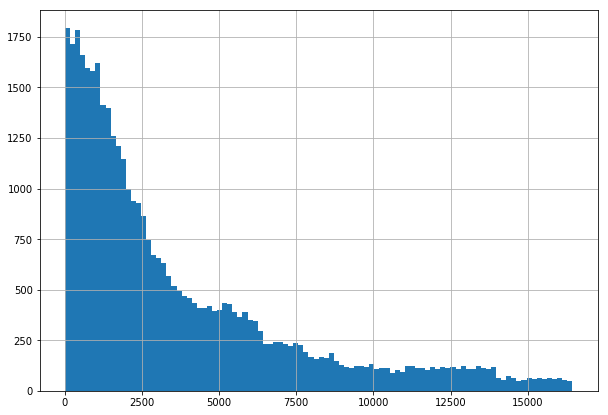

In [1167]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

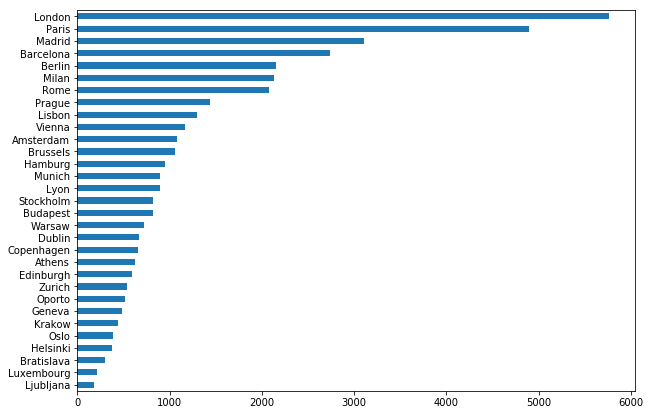

In [1168]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

In [ ]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

In [ ]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

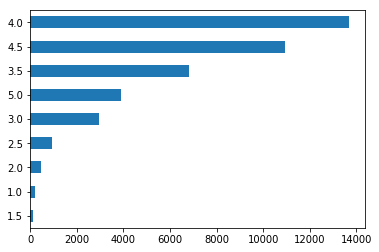

In [1545]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

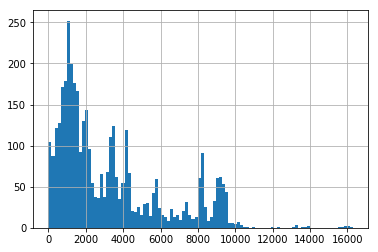

In [1546]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

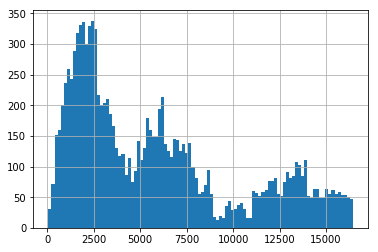

In [1547]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

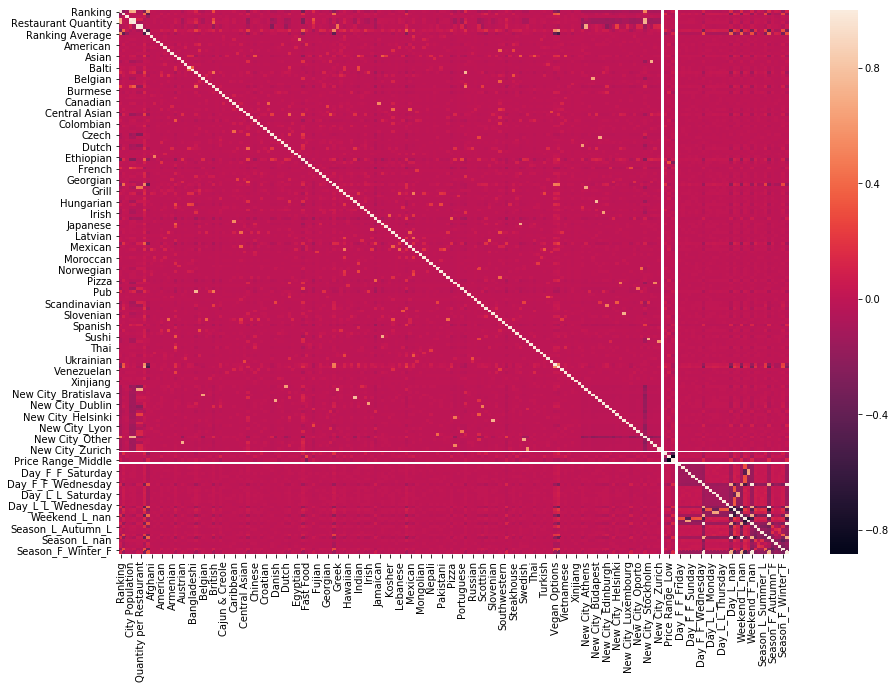

In [1548]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [1574]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [1575]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
#     df_output.drop(['Restaurant_id','ID_TA','URL_TA'], axis = 1, inplace=True)
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    
    # Let's find most popular collection of cuisines in each city
    top_cuisines = df_output.groupby(['City','Cuisine Style'])['Restaurant_id'].count().sort_values().groupby(level=0).tail(1).sort_index()
    
    # We can change NaN in 'Cuisine Style' using data from top cuisines instead of it.
    for city in df_output['City'].unique():
        df_output.loc[((df_output['Cuisine Style'].isna()) & (df_output['City'] == city), 'Cuisine Style')] = top_cuisines[city].index[0]
    
    # As we can see there are a lot of NaN
    # Let's change NaN to average of data
    df_output.loc[df_output['Price Range'].isna(), 'Price Range'] = df_output['Price Range'].mode()[0]
    
    # Let's find most popular collection of 'Number of Reviews' in each city
    top_nreviews = df_output.groupby(['City','Number of Reviews'])['Restaurant_id'].count().sort_values().groupby(level=0).tail(1).sort_values(ascending=False)
    
    # The same as did for Cuisine let's change NaN in 'Number of Reviews'
    for city in data['City'].unique():
        df_output.loc[((df_output['Number of Reviews'].isna()) & (df_output['City'] == city), 'Number of Reviews')] = top_nreviews[city].index[0]
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    
    # The function convert text to list, if string doesn't content any data return NaN
    def get_dates(row):
        if type(row) != float:
            row_list = [x.split("', ") for x in row.replace('"',"'").split("'], ")]
            if len(row_list) > 1:
                row_list[0] = [x.replace('[','').replace("'","") for x in row_list[0]]
                row_list[1] = [x.replace(']','').replace('[','').replace("'","") for x in row_list[1]]
                return row_list
            else:
                return np.nan
        else:
            return np.nan

    df_output['Reviews'] = df_output['Reviews'].apply(get_dates)
    
    # Let's make new columns with feedback information like own feedback and dates
    # This operation can take little bit more time
    df_output['first_feedback'] =df_output['Reviews'].apply(lambda x: x[0][0] if type(x) != float else np.nan)
    df_output['last_feedback'] = df_output['Reviews'].apply(lambda x: x[0][1] if type(x) != float and len(x[0])>1 else np.nan)
    df_output['first_date'] = df_output['Reviews'].apply(lambda x: pd.to_datetime(x[1][0],format='%m/%d/%Y', errors='coerce') if type(x) != float else np.nan)
    df_output['last_date'] = df_output['Reviews'].apply(lambda x: pd.to_datetime(x[1][1],format='%m/%d/%Y', errors='coerce') if type(x) != float and len(x[1])>1 else np.nan)
    
     # Create new features related with dates
    df_output['Day_L'] = df_output['last_date'].dt.dayofweek.replace(list(range(7)),['L_Monday','L_Tuesday','L_Wednesday','L_Thursday','L_Friday','L_Saturday','L_Sunday'])
    df_output['Day_F'] = df_output['first_date'].dt.dayofweek.replace(list(range(7)),['F_Monday','F_Tuesday','F_Wednesday','F_Thursday','F_Friday','F_Saturday','F_Sunday'])
    
    df_output['Weekend_L'] = df_output['last_date'].dt.dayofweek//5
    df_output['Weekend_F'] = df_output['first_date'].dt.dayofweek//5
    df_output['Weekend_L'].replace([0,1],['L_Weekend_Sat', 'L_Weekend_Sun'], inplace=True)
    df_output['Weekend_F'].replace([0,1],['F_Weekend_Sat', 'F_Weekend_Sun'], inplace=True)
    
    df_output['Season_L'] = df_output['last_date'].dt.month%12//3+1
    df_output['Season_F'] = df_output['first_date'].dt.month%12//3+1
    df_output['Season_L'].replace(list(range(1,5)),['Winter_L', 'Spring_L', 'Summer_L', 'Autumn_L'], inplace=True)
    df_output['Season_F'].replace(list(range(1,5)),['Winter_F', 'Spring_F', 'Summer_F', 'Autumn_F'], inplace=True)
    
    # Let's make Top cities and others rename as 'Other'
    all_cities = df_output['City'].value_counts().index.to_list()
    df_output['New City'] = df_output['City']
    top_city_list = df_output['New City'].value_counts()[df_output['New City'].value_counts() > np.percentile((df_output['New City'].value_counts().values), 70)].index.tolist()
    
    cities_to_drop = list(set(all_cities)-set(top_city_list))
    df_output.loc[df_output['New City'].isin(top_city_list), 'New City'] = 'Other'
    
    # Let's make Top cuisine and others rename as 'Other'
    all_cuisine = df_output['Cuisine Style'].value_counts().index.to_list()
    df_output['New Cuisine Style'] = df_output['Cuisine Style']
    top_cuisine_list = df_output['New Cuisine Style'].value_counts()[df_output['New Cuisine Style'].value_counts() > np.percentile((df_output['New Cuisine Style'].value_counts().values), 70)].index.tolist()
    
    cuisine_to_drop = list(set(all_cuisine)-set(top_cuisine_list))
    df_output.loc[df_output['New Cuisine Style'].isin(top_city_list), 'New Cuisine Style'] = 'Other'
    
    # Create dummies data from cuisine style
    df_output['Cuisine'] = df_output['New Cuisine Style'].apply(lambda x: eval(x) if type(x) != float else x)
    df_cuisine = pd.get_dummies(df_output['Cuisine'].apply(pd.Series).stack()).sum(level=0)
    df_output = df_output.join(df_cuisine)
    
    # Create dummies data
    df_output = pd.get_dummies(df_output, columns=['New City','Price Range', 'Day_F','Day_L','Weekend_L','Weekend_F','Season_L','Season_F'], dummy_na=True)

    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    
    # Let's add extension information about population for each city
    city_population = {
        'Amsterdam': 1148972,
        'Paris': 11017230,
        'Athens': 3153355,
        'Barcelona': 5585556,
        'Berlin': 3562038,
        'Bratislava': 563682,
        'Brussels': 2080788,
        'Budapest': 1768073,
        'Copenhagen': 1346485,
        'Dublin': 1228179,
        'Edinburgh': 536775,
        'Geneva': 613373,
        'Hamburg': 1789954,
        'Helsinki': 1304851,
        'Krakow': 768731,
        'Lisbon': 2956879,
        'Ljubljana': 295504,
        'London': 9304016,
        'Luxembourg': 626108,
        'Lyon': 1719268,
        'Madrid': 6617513,
        'Milan': 3140181,
        'Munich': 1538302,
        'Oslo': 1041377,
        'Oporto': 1312947,
        'Prague': 1305737,
        'Rome': 4257056,
        'Stockholm': 1632798,
        'Vienna': 1929944,
        'Warsaw': 1783251,
        'Zurich': 1395356
    }
    
    # Create new feature with population info
    df_output['City Population'] = df_output['City'].map(city_population)
    
    # Create new feature - quantity of restaurant for each city
    city_restaurant = dict(df_output['City'].value_counts())
    df_output['Restaurant Quantity'] = df_output['City'].map(city_restaurant)
    
    # New feature with quantity of people for each restaurant in a city
    df_output['Quantity per Restaurant'] = df_output['City Population']/df_output['Restaurant Quantity']
    
    # New feature - quantity of cuisine
    df_output['Cuisine Quantity'] = df_output['Cuisine Style'].apply(lambda x: len(eval(x)))
    
    # New feature of average ranking for quantity restaurants by city
    df_output['Ranking Average'] = df_output['Ranking']/df_output['Restaurant Quantity']
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object' or df_output[s].dtypes == 'datetime64[ns]']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [1576]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Number of Reviews,sample,Rating,Afghani,African,Albanian,American,Arabic,Argentinean,...,Season_F_Autumn_F,Season_F_Spring_F,Season_F_Summer_F,Season_F_Winter_F,Season_F_nan,City Population,Restaurant Quantity,Quantity per Restaurant,Cuisine Quantity,Ranking Average
25652,2989.0,9.0,1,4.5,0,0,0,0,0,0,...,0,0,0,1,0,3562038,2705,1316.834750,1,1.104991
21053,3593.0,2.0,1,5.0,0,0,0,0,0,0,...,0,0,0,0,1,6617513,3813,1735.513506,1,0.942303
21556,2404.0,22.0,1,3.5,0,0,0,0,0,0,...,0,0,1,0,0,1789954,1186,1509.236088,1,2.026981
34130,2377.0,3.0,1,3.5,0,0,0,0,0,0,...,0,0,0,0,1,1538302,1145,1343.495197,1,2.075983
30120,904.0,302.0,1,3.5,0,0,0,0,0,0,...,0,0,0,1,0,2956879,1647,1795.312083,2,0.548877
11722,5425.0,73.0,1,3.5,0,0,0,0,0,0,...,0,0,0,0,1,3140181,2694,1165.620267,1,2.013734
22237,4560.0,31.0,1,4.0,0,0,0,0,0,0,...,0,0,0,0,1,4257056,2589,1644.285825,1,1.761298
28612,1074.0,25.0,1,4.5,0,0,0,0,0,1,...,1,0,0,0,0,1148972,1372,837.443149,4,0.782799
4099,12775.0,31.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,11017230,6108,1803.737721,1,2.091519
22174,252.0,1006.0,1,4.5,0,0,0,0,0,0,...,0,0,0,1,0,11017230,6108,1803.737721,4,0.041257


In [1577]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 194 entries, Ranking to Ranking Average
dtypes: float64(5), int64(4), uint8(185)
memory usage: 12.3 MB


In [1578]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [1579]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [1580]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 193), (40000, 193), (40000, 192), (32000, 192), (8000, 192))

# Model 
Сам ML

In [1581]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [1582]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [1594]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [ ]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.207828125


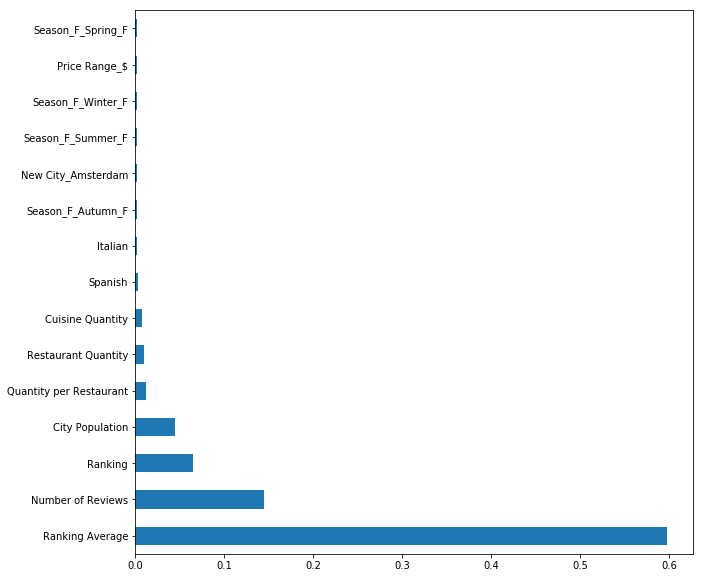

In [1585]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [1586]:
test_data.sample(10)

,Ranking,Number of Reviews,Rating,Afghani,African,Albanian,American,Arabic,Argentinean,Armenian,...,Season_F_Autumn_F,Season_F_Spring_F,Season_F_Summer_F,Season_F_Winter_F,Season_F_nan,City Population,Restaurant Quantity,Quantity per Restaurant,Cuisine Quantity,Ranking Average
9508,5728.0,2.0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,4257056,2589,1644.285825,1,2.212437
6732,659.0,6.0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,1395356,685,2037.016058,2,0.962044
5567,64.0,331.0,0.0,0,0,0,0,0,0,0,...,1,0,0,0,0,4257056,2589,1644.285825,6,0.024720
5906,1147.0,7.0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,1395356,685,2037.016058,2,1.674453
386,288.0,76.0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,1789954,1186,1509.236088,5,0.242833
761,1905.0,12.0,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,1783251,925,1927.838919,3,2.059459
9652,1738.0,3.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,1929944,1443,1337.452529,2,1.204435
5174,558.0,70.0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,1929944,1443,1337.452529,5,0.386694
8130,2127.0,4.0,0.0,0,0,0,1,0,0,0,...,0,0,1,0,0,1538302,1145,1343.495197,5,1.857642
8503,4619.0,198.0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,9304016,7193,1293.481996,4,0.642152


In [1587]:
test_data = test_data.drop(['Rating'], axis=1)

In [1588]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [1589]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [1590]:
predict_submission

array([2.975, 4.185, 4.46 , ..., 3.015, 4.49 , 4.29 ])

In [1591]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,2.975
1,id_1,4.185
2,id_2,4.460
3,id_3,4.375
4,id_4,4.465
5,id_5,4.525
6,id_6,1.740
7,id_7,2.645
8,id_8,4.070
9,id_9,4.580


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
